In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00


In [ ]:
import random
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
v8n_br35h = YOLO("/content/drive/MyDrive/brain_tumor_det/runs_v8n_br35h_train/train/weights/best.pt")
v8s_br35h=YOLO("/content/drive/MyDrive/brain_tumor_det/runs_v8s_br35h_train/train2/weights/best.pt")
v8n_multi=YOLO("/content/drive/MyDrive/runs_multiclass/train/weights/best.pt")



In [ ]:
TEST_br35h = "/content/drive/MyDrive/brain_tumor_det/BR35H_roboflow_boxes/images/test"

test_images = [
    os.path.join(TEST_br35h, f)
    for f in os.listdir(TEST_br35h)
    if f.endswith((".jpg", ".png", ".jpeg"))
]

random_images = random.sample(test_images, 10)


In [ ]:
TEST_multi = "/content/drive/MyDrive/brain_tumor_det/multiclass tumor dataset/images/test"

test_multi = [
    os.path.join(TEST_multi, f)
    for f in os.listdir(TEST_multi)
    if f.endswith((".jpg", ".png", ".jpeg"))
]

random_images_multi = random.sample(test_images, 10)


In [ ]:
def predict_and_show(model, image_paths, title):
    plt.figure(figsize=(15, 10))

    for i, img_path in enumerate(image_paths):
        results = model(img_path, conf=0.25)
        annotated = results[0].plot()

        annotated = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.subplot(2, 5, i + 1)
        plt.imshow(annotated)
        plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
predict_and_show(v8n_br35h, random_images, "YOLOv8n – Test Set Predictions")
predict_and_show(v8s_br35h, random_images, "YOLOv8s – Test Set Predictions")
predict_and_show(v8n_multi, random_images_multi, "YOLOv8n – multiclass Test Set Predictions")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
from collections import defaultdict

# CHANGE THIS
DATASET_PATH = "/content/drive/MyDrive/brain_tumor_det/multiclass tumor dataset/labels"

SPLITS = ["train", "val", "test"]

def count_images_per_class(label_dir):
    class_images = defaultdict(set)

    for file in os.listdir(label_dir):
        if not file.endswith(".txt"):
            continue

        file_path = os.path.join(label_dir, file)

        with open(file_path, "r") as f:
            classes_in_image = set()
            for line in f:
                class_id = int(line.split()[0])
                classes_in_image.add(class_id)

        for cls in classes_in_image:
            class_images[cls].add(file)

    return {cls: len(files) for cls, files in class_images.items()}


results = {}

for split in SPLITS:
    split_path = os.path.join(DATASET_PATH, split)
    results[split] = count_images_per_class(split_path)

# Print nicely
print("Class-wise Image Distribution\n")
for split in SPLITS:
    print(f"{split.upper()} SET")
    for cls, count in sorted(results[split].items()):
        print(f"  Class {cls}: {count} images")
    print()


Class-wise Image Distribution

TRAIN SET
  Class 0: 564 images
  Class 1: 358 images
  Class 2: 335 images
  Class 3: 438 images

VAL SET
  Class 0: 161 images
  Class 1: 124 images
  Class 2: 99 images
  Class 3: 118 images

TEST SET
  Class 0: 80 images
  Class 1: 63 images
  Class 2: 49 images
  Class 3: 54 images



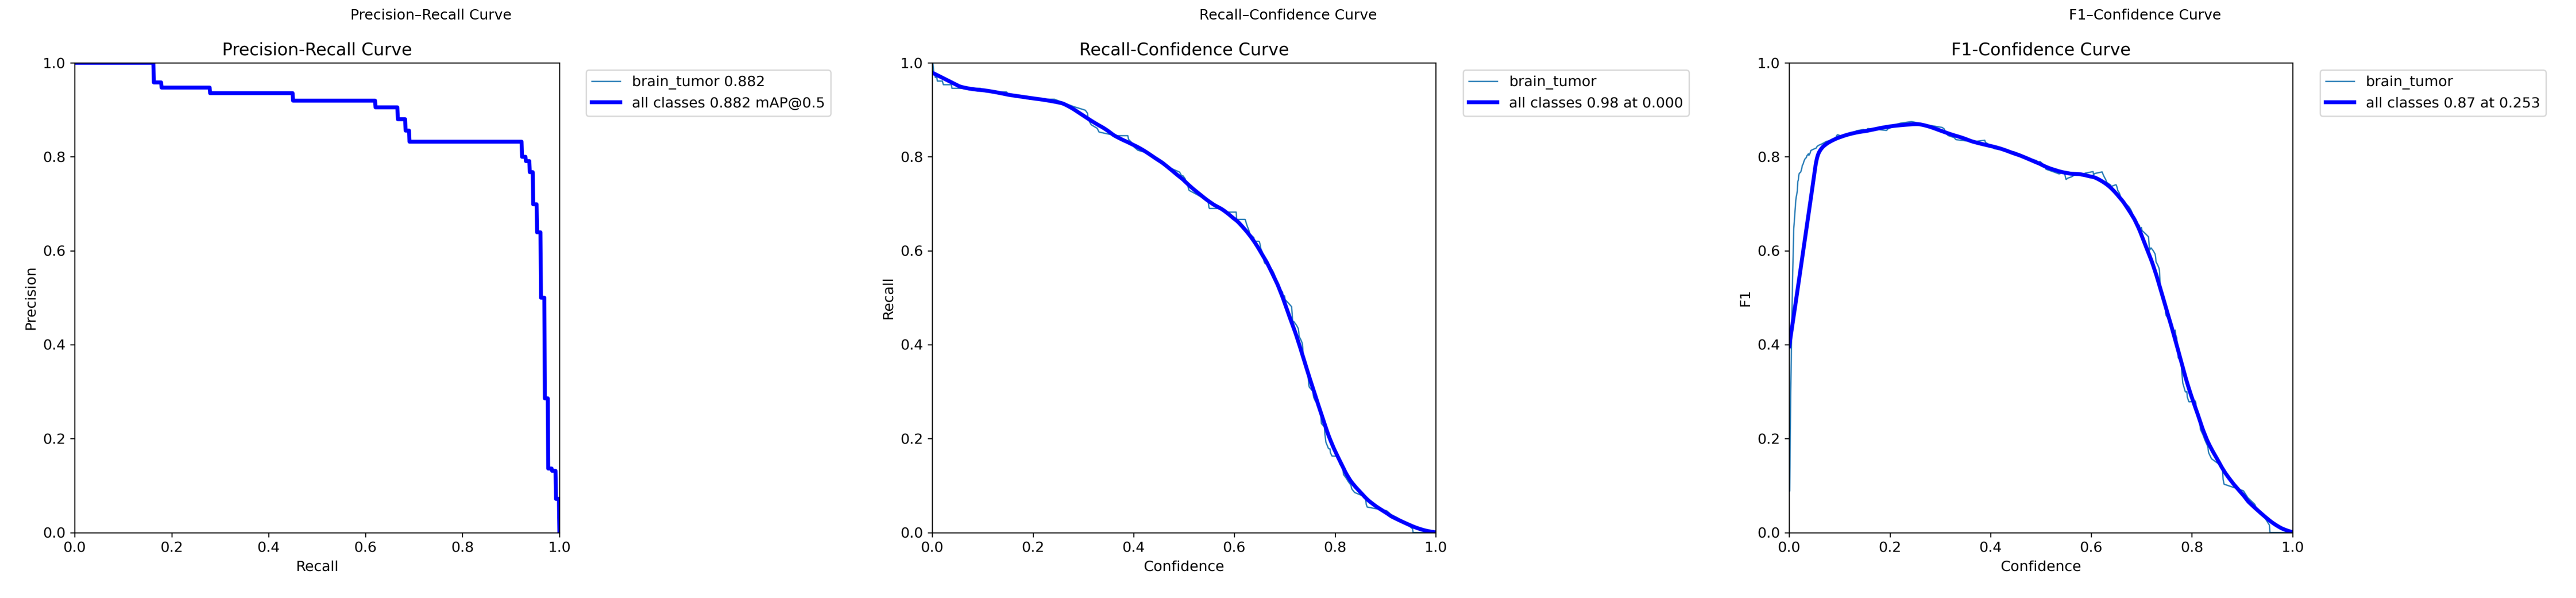

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to the folder containing the images
base_path = "/content/drive/MyDrive/brain_tumor_det/runs_v8s_br35h_train/train2"

# Image files you want to display (adjust names if needed)
image_files = [
    "BoxPR_curve.png",      # Precision-Recall
    "BoxR_curve.png",       # Recall-Confidence
    "BoxF1_curve.png",      # F1-Confidence
      # Confusion Matrix
]

titles = [
    "Precision–Recall Curve",
    "Recall–Confidence Curve",
    "F1–Confidence Curve",
    "Confusion Matrix"
]

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(30,10),dpi=150)
# axes = axes.flatten()

for ax, img_name, title in zip(axes, image_files, titles):
    img_path = os.path.join(base_path, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to the folder containing the images
base_path = "/content/drive/MyDrive/brain_tumor_det/runs_v8n_br35h_train/train"

# Image files you want to display (adjust names if needed)
image_files = [
    "BoxPR_curve.png",      # Precision-Recall
    "BoxR_curve.png",       # Recall-Confidence
    "BoxF1_curve.png",      # F1-Confidence

]

titles = [
    "Precision–Recall Curve",
    "Recall–Confidence Curve",
    "F1–Confidence Curve",
    "Confusion Matrix"
]

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(24, 24))
axes = axes.flatten()

for ax, img_name, title in zip(axes, image_files, titles):
    img_path = os.path.join(base_path, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()
